In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import PIL
import random

import kagglehub
from kagglehub import KaggleDatasetAdapter

random.seed(420)

# Set the path to the file you'd like to load
file_path = "/csv/dicom_info.csv"
image_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'
dataset_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset'

dicom_data = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

In [2]:
file_path = "/csv/mass_case_description_train_set.csv"

# Load the latest version
mass_case_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "awsaf49/cbis-ddsm-breast-cancer-image-dataset",
  file_path,
)

# # print("First 5 records:", mass_case_train.head())
# # mass_case_train.columns
# mass_case_train[["image file path", "cropped image file path", "ROI mask file path"]].iloc[0]
# print(mass_case_train["image file path"][0])
# print(mass_case_train["cropped image file path"][0])
# print(mass_case_train["ROI mask file path"][0])

/tmp/ipykernel_46/3746630101.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  mass_case_train = kagglehub.load_dataset(


# Mostrar un exemple de mamografia amb els tres tipus d'imatge

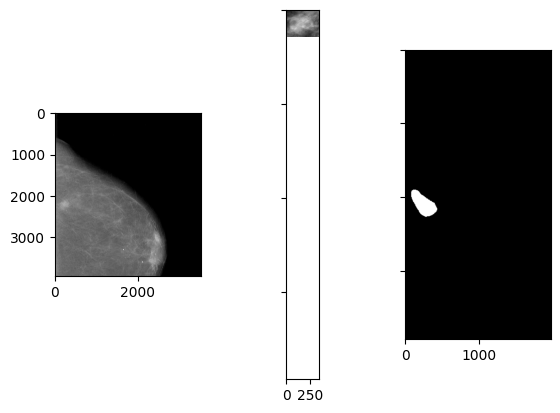

In [3]:
full_mammogram_images = (
    dicom_data[dicom_data.SeriesDescription == 'full mammogram images']
    .image_path
    .apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
)
roi_mammogram_images = (
    dicom_data[dicom_data.SeriesDescription == 'ROI mask images']
    .image_path
    .apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
)
cropped_mammogram_images = (
    dicom_data[dicom_data.SeriesDescription == 'cropped images']
    .image_path
    .apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
)

full = PIL.Image.open(full_mammogram_images.iloc[0]).convert("L")

cropped = PIL.Image.open(cropped_mammogram_images.iloc[0]).convert("L")

roi = PIL.Image.open(roi_mammogram_images.iloc[0]).convert("L")


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.imshow(full, cmap='gray')
ax2.imshow(cropped, cmap='gray')
ax3.imshow(roi, cmap='gray')

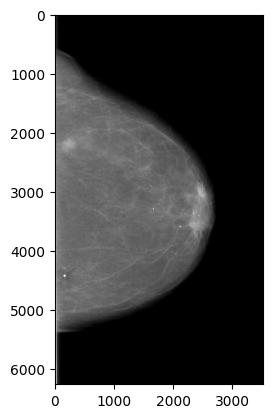

In [4]:
plt.imshow(full, cmap='gray')

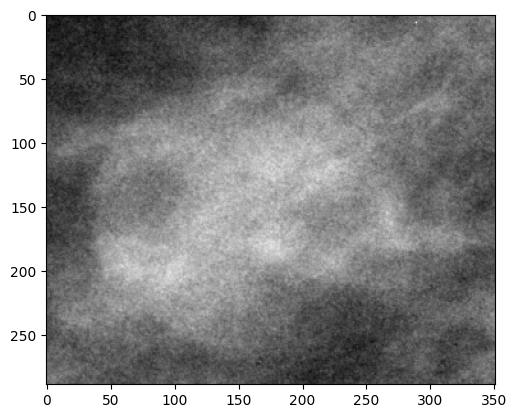

In [5]:
plt.imshow(cropped, cmap='gray')

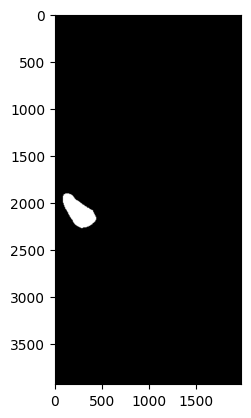

In [6]:
plt.imshow(roi, cmap='gray')

## Tipus d'imatges

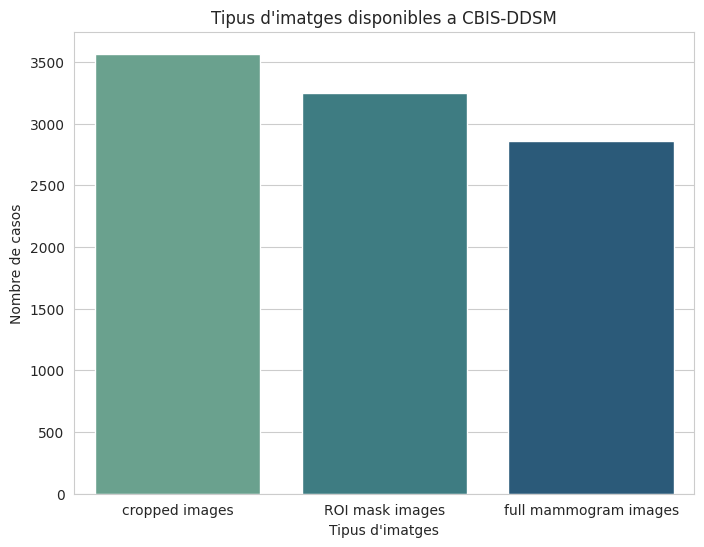

In [7]:
dicom_data['image_path'] = dicom_data.image_path.apply(lambda x: x.replace('CBIS-DDSM', dataset_dir))

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x = dicom_data.SeriesDescription.value_counts(dropna=False).index,
    y = dicom_data.SeriesDescription.value_counts(dropna=False),
    palette='crest'
)
ax.set(xlabel="Tipus d'imatges", ylabel='Nombre de casos', title = "Tipus d'imatges disponibles a CBIS-DDSM")
plt.show()

## Distribució de la resolució de les imatges

In [8]:
%%time
import imagesize
data = dicom_data['image_path'].map(lambda path: imagesize.get(path))
width, height = list(zip(*data))
dicom_data['width'] = width
dicom_data['height'] = height

CPU times: user 2.35 s, sys: 5.82 s, total: 8.17 s
Wall time: 1min 52s


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


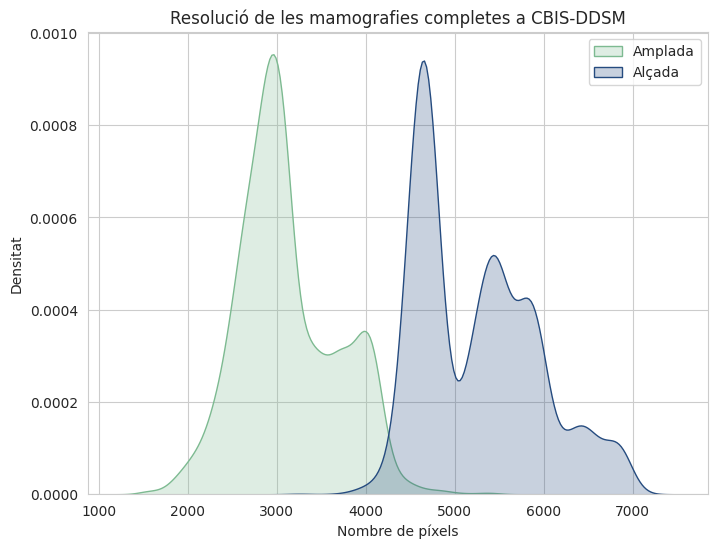

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
colors = sns.color_palette('crest')
ax = sns.kdeplot(dicom_data.query("SeriesDescription=='full mammogram images'")['width'], fill=True, color=colors[0])
ax = sns.kdeplot(dicom_data.query("SeriesDescription=='full mammogram images'")['height'], fill=True, color=colors[5])
plt.legend(['Amplada','Alçada'])

ax.set(xlabel = "Nombre de píxels", ylabel='Densitat', title = "Resolució de les mamografies completes a CBIS-DDSM")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


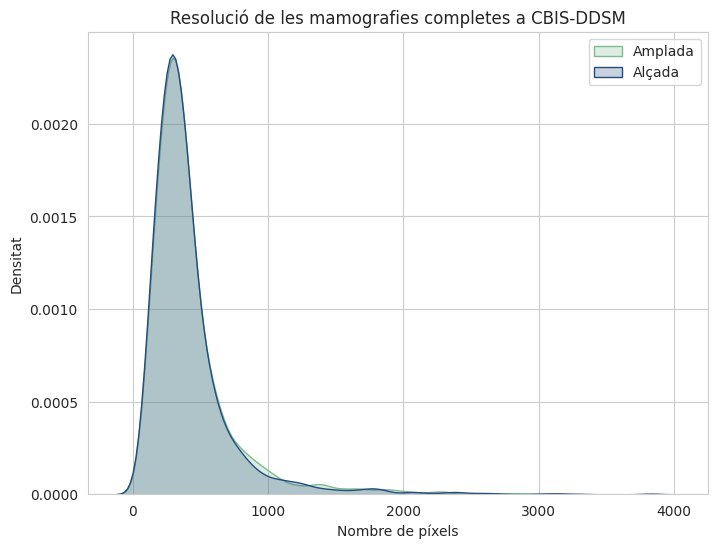

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
colors = sns.color_palette('crest')
ax = sns.kdeplot(dicom_data.query("SeriesDescription=='cropped images'")['width'], fill=True, color=colors[0])
ax = sns.kdeplot(dicom_data.query("SeriesDescription=='cropped images'")['height'], fill=True, color=colors[5])
plt.legend(['Amplada','Alçada'])

ax.set(xlabel = "Nombre de píxels", ylabel='Densitat', title = "Resolució de les mamografies completes a CBIS-DDSM")
plt.show()

## Explorar el nombre de anomalies en calcificacions

In [13]:
calcifications_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "awsaf49/cbis-ddsm-breast-cancer-image-dataset",
  "/csv/calc_case_description_train_set.csv",
)
calcifications_train["dataset_type"] = "train"


calcifications_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "awsaf49/cbis-ddsm-breast-cancer-image-dataset",
  "/csv/calc_case_description_test_set.csv",
)
calcifications_test["dataset_type"] = "test"

calcifications_total=pd.concat([calcifications_train, calcifications_test])


/tmp/ipykernel_46/1573993035.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  calcifications_train = kagglehub.load_dataset(
/tmp/ipykernel_46/1573993035.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  calcifications_test = kagglehub.load_dataset(


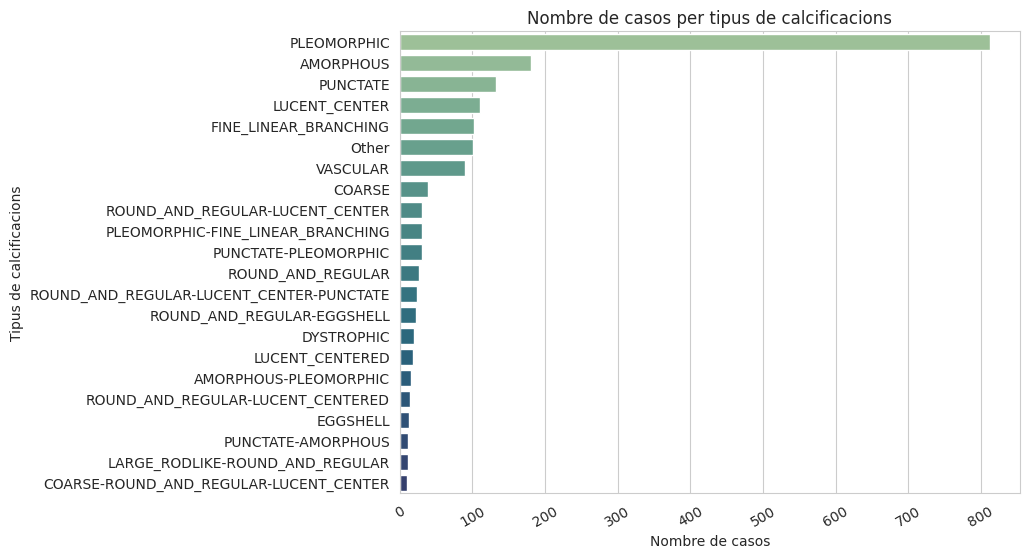

In [14]:
# calcifications_total.groupby(["patient_id", "image view"])[["calc type", "calc distribution"]].value_counts()
# calcifications_total["calc type"].value_counts()
# calcifications_total.query("patient_id == 'P_00005'")["image file path"]
# len(calcifications_total

calcification_type_counts = calcifications_total["calc type"].value_counts()
mask = (calcification_type_counts/calcification_type_counts.sum() * 100).lt(0.5)
calcifications_total['calc_type_plot'] = np.where(calcifications_total['calc type'].isin(calcification_type_counts[mask].index),'Other',calcifications_total['calc type'])


sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    y = calcifications_total["calc_type_plot"].value_counts(dropna=False).index,
    x = calcifications_total["calc_type_plot"].value_counts(dropna=False),
    palette='crest',
)
ax.set(ylabel="Tipus de calcificacions", xlabel='Nombre de casos', title = "Nombre de casos per tipus de calcificacions")
plt.xticks(rotation=30)
plt.show()

In [17]:
calcifications_total.assessment.value_counts()

,breast density,abnormality id,assessment,subtlety
count,1872.000000,1872.000000,1872.000000,1872.000000
mean,2.669338,1.380342,3.292735,3.395299
std,0.932322,0.853576,1.224108,1.181426
min,0.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


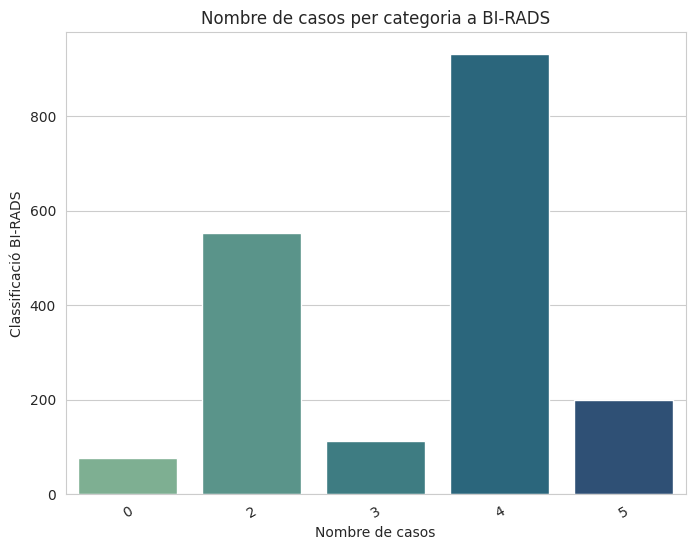

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x = calcifications_total["assessment"].value_counts(dropna=False).index,
    y = calcifications_total["assessment"].value_counts(dropna=False),
    palette='crest',
)
ax.set(ylabel="Classificació BI-RADS", xlabel='Nombre de casos', title = "Nombre de casos per categoria a BI-RADS")
plt.xticks(rotation=30)
plt.show()

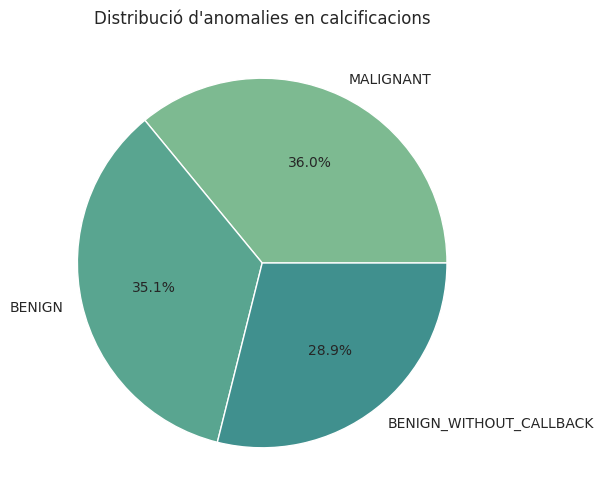

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
colors = sns.color_palette('crest')
plt.pie(
    calcifications_total.pathology.value_counts(dropna=False),
    labels=calcifications_total.pathology.value_counts(dropna=False).index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title("Distribució d'anomalies en calcificacions")
plt.show()

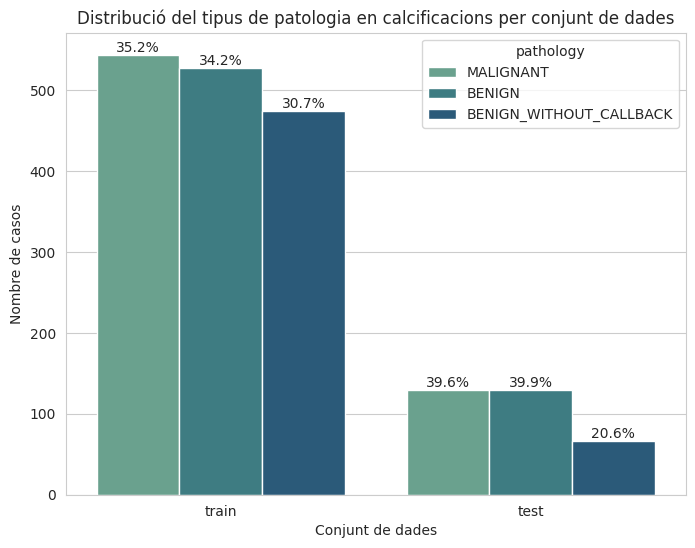

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
colors = sns.color_palette('crest')
ax = sns.countplot(calcifications_total, x="dataset_type", hue="pathology", palette="crest")

ax.set(xlabel="Conjunt de dades", ylabel='Nombre de casos', title = "Distribució del tipus de patologia en calcificacions per conjunt de dades")

# get the total count of the type column
total = calcifications_total.dataset_type.value_counts().tolist()
total
# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total[0])*100:0.1f}%' if x > 400 else  f'{(x/total[1])*100:0.1f}%')

## Explorar el nombre d'anomalies en Masses

In [22]:
mass_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "awsaf49/cbis-ddsm-breast-cancer-image-dataset",
  "/csv/mass_case_description_train_set.csv",
)

mass_train["dataset_type"] = "train"

mass_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "awsaf49/cbis-ddsm-breast-cancer-image-dataset",
  "/csv/mass_case_description_test_set.csv",
)

mass_test["dataset_type"] = "test"

mass_total=pd.concat([mass_train, mass_test])
mass_total.head()

/tmp/ipykernel_46/2360352050.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  mass_train = kagglehub.load_dataset(
/tmp/ipykernel_46/2360352050.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  mass_test = kagglehub.load_dataset(


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,dataset_type
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,train
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,train
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,train
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,train
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,train


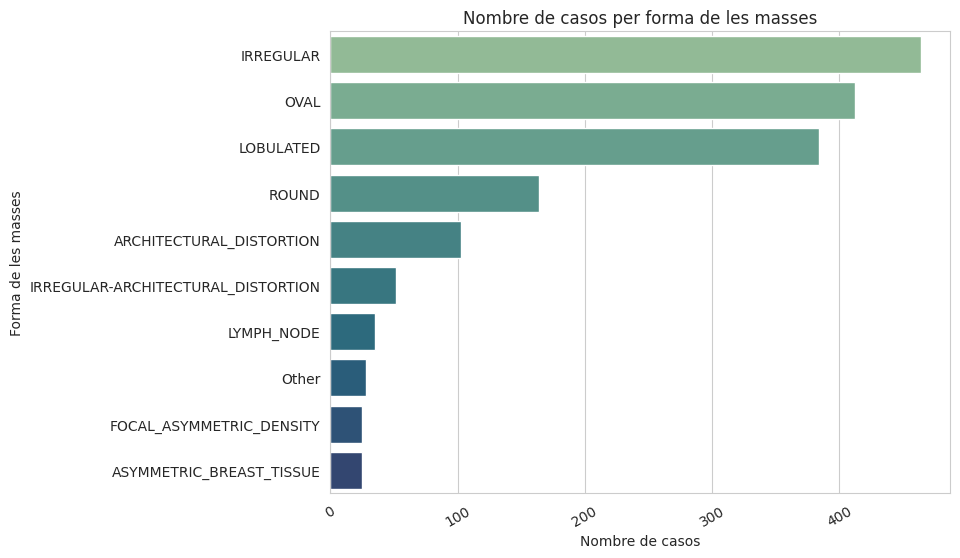

In [24]:
mass_type_counts = mass_total["mass shape"].value_counts()
mask = (mass_type_counts/mass_type_counts.sum() * 100).lt(0.5)
mass_total['mass_type_plot'] = np.where(mass_total['mass shape'].isin(mass_type_counts[mask].index),'Other',mass_total['mass shape'])


sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    y = mass_total["mass_type_plot"].value_counts(dropna=False).index,
    x = mass_total["mass_type_plot"].value_counts(dropna=False),
    palette='crest',
)
ax.set(ylabel="Forma de les masses", xlabel='Nombre de casos', title = "Nombre de casos per forma de les masses")
plt.xticks(rotation=30)
plt.show()

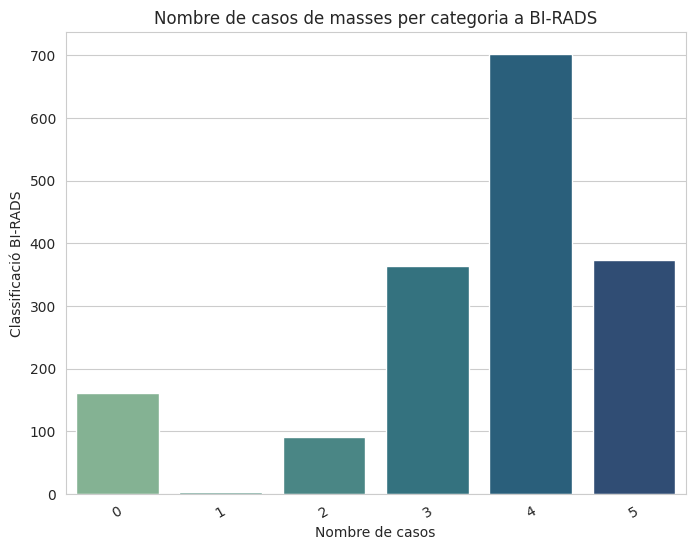

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x = mass_total["assessment"].value_counts(dropna=False).index,
    y = mass_total["assessment"].value_counts(dropna=False),
    palette='crest',
)
ax.set(ylabel="Classificació BI-RADS", xlabel='Nombre de casos', title = "Nombre de casos de masses per categoria a BI-RADS")
plt.xticks(rotation=30)
plt.show()

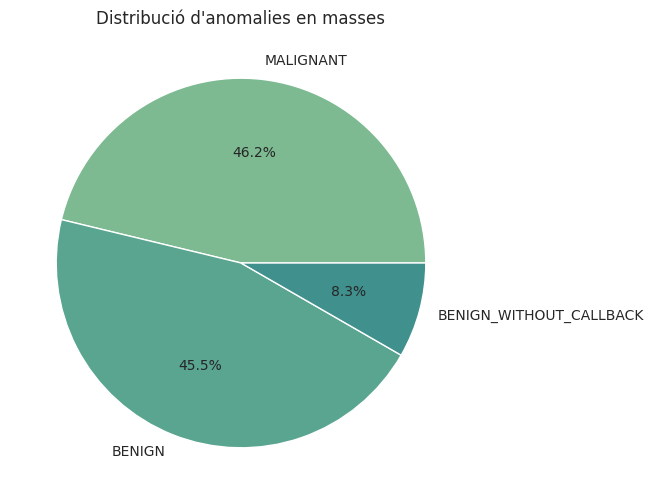

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
colors = sns.color_palette('crest')
plt.pie(
    mass_total.pathology.value_counts(dropna=False),
    labels=mass_total.pathology.value_counts(dropna=False).index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title("Distribució d'anomalies en masses")
plt.show()

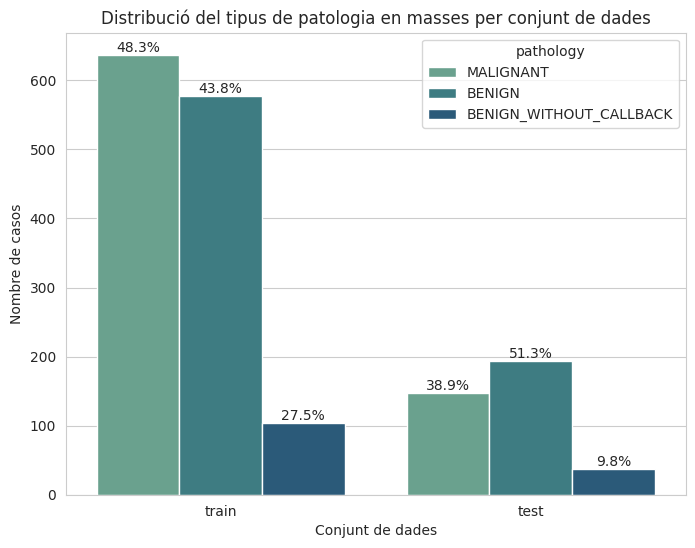

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
colors = sns.color_palette('crest')
ax = sns.countplot(mass_total, x="dataset_type", hue="pathology", palette="crest")

ax.set(xlabel="Conjunt de dades", ylabel='Nombre de casos', title = "Distribució del tipus de patologia en masses per conjunt de dades")

# get the total count of the type column
total = mass_total.dataset_type.value_counts().tolist()
total
# annotate the bars with fmt from matplotlib v3.7.0
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total[0])*100:0.1f}%' if x > 400 else  f'{(x/total[1])*100:0.1f}%')